# CUSTOMER SEGMENTATION 
This script performs customer segmentation on the Mall Customers dataset using K-Means clustering.
The goal is to identify distinct customer groups based on their spending habits and demographics,
which can inform targeted marketing strategies.

Key steps include:
1. Data loading and initial exploration.
2. Visualizing key distributions (Age, Income, Spending Score).
3. Applying K-Means clustering on 'Annual Income' and 'Spending Score'.
4. Using the Elbow Method to determine the optimal number of clusters (k).
5. Visualizing the resulting customer segments.
6. Analyzing and profiling the identified clusters, particularly the high-value segment.

# 1) Setup & Data Loading.
- Import necessary libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter running warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

df.head() # Display the first 5 rows to check data structure.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail() # Display the last 5 rows to check data structure.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Display the Dataframe columns.
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Chech for missing values.
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Display basic data information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Check for duplicated rows or columns.
df.duplicated().sum()

0

In [9]:
# Generate descriptive statistics for all columns, including non-numeric ones.
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


# 2) Initial Visualizations.

- Use matplotlib and seaborn to visualize the distributions of key features.
- This helps in understanding the spread and central tendency of the data.

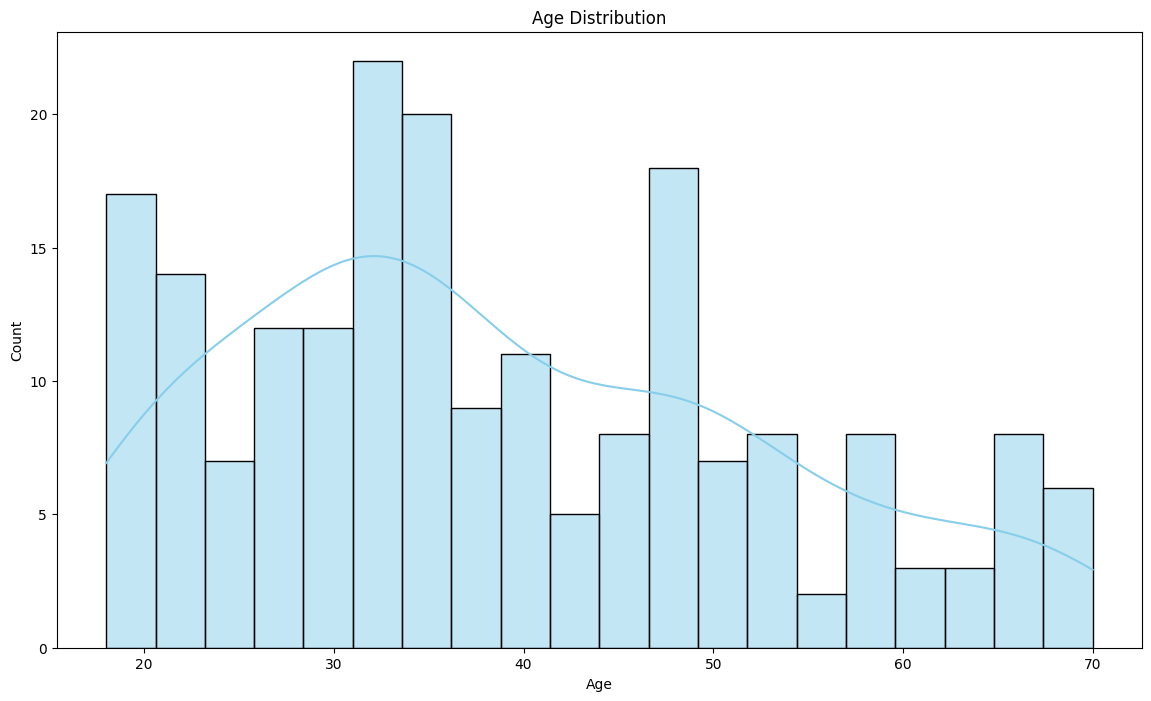

In [10]:
# Plot the distribution of 'Age'
plt.figure(figsize=(14,8))
sn.histplot(df["Age"], bins=20, kde=True, color="skyblue")

plt.title("Age Distribution")

plt.show()

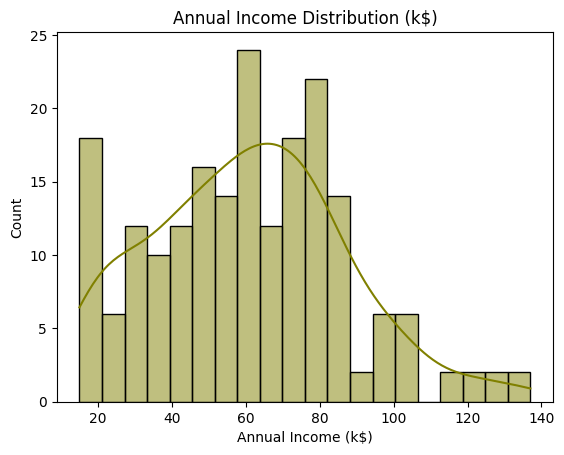

In [11]:
# Plot the distribution of 'Annual Income (k$)'
sn.histplot(df["Annual Income (k$)"], bins=20, kde=True, color="olive")
plt.title("Annual Income Distribution (k$)")

plt.show()

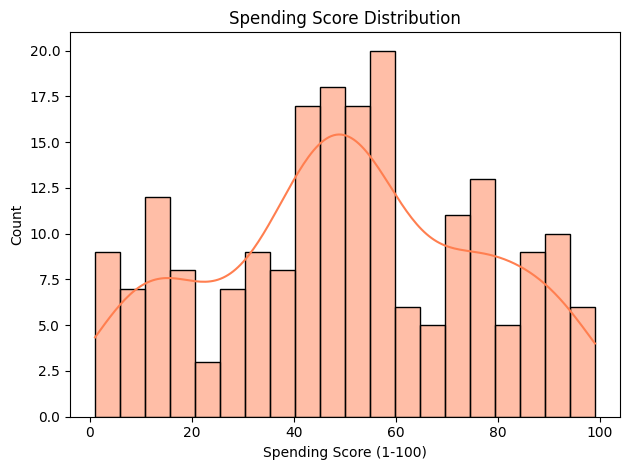

In [12]:
# Plot the distribution of 'Spending Score (1-100)'
sn.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="coral")
plt.title("Spending Score Distribution")

plt.tight_layout()
plt.show()

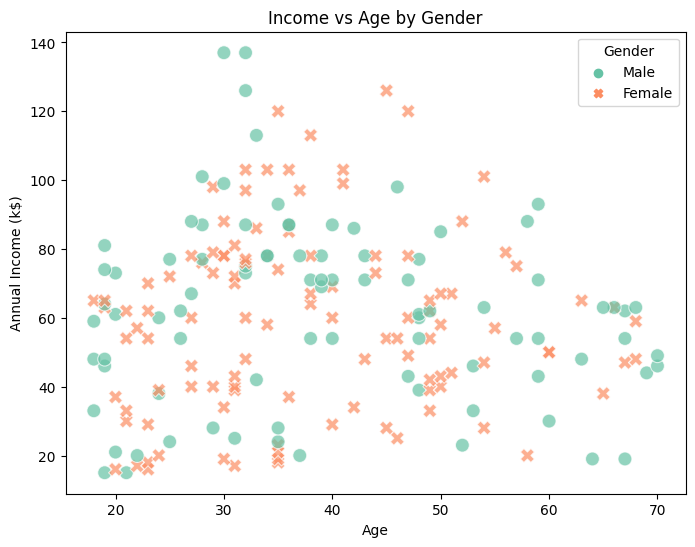

In [13]:
# Create a scatter plot to visualize the relationship between 'Age' and 'Annual Income',
# with points colored and styled by 'Gender'. This helps identify any gender-based patterns.
# Scatter: Income vs. Age, colored by Gender
plt.figure(figsize=(8,6))
sn.scatterplot(
    data=df,
    x="Age", y="Annual Income (k$)",
    hue="Gender", style="Gender",
    palette="Set2", s=100, alpha=0.7
)
plt.title("Income vs Age by Gender")
plt.show()

# 3) Segmentation: K-Means clustering on Income + Spending Score.

- Select the features for clustering: Annual Income and Spending Score.
- These two features are often the most effective for customer segmentation in this context.

- Scale the features using StandardScaler.
- Standardization is crucial for K-Means as it's sensitive to the magnitude of features.
- It centers the data around 0 with a standard deviation of 1.

In [14]:
# Segmentation: K-Means clustering on Income + Spending Score
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Clustering
- Find the optimal number of clusters (k) using the Elbow Method.
- The method plots the within-cluster sum of squares (WCSS) against the number of clusters.
- The "elbow" point, where the WCSS starts to decrease linearly, is a good choice for k.

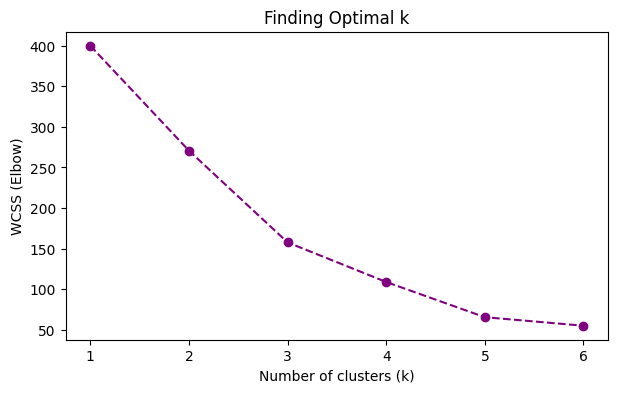

In [15]:
# Find optimal K with Elbow Method
wcss = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method results.
plt.figure(figsize=(7,4))
plt.plot(range(1,7), wcss, marker='o', linestyle='--', color='purple')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Elbow)")
plt.title("Finding Optimal k")
plt.xticks(range(1,7))

plt.show()

# Choose k
- Apply K-Means with the chosen optimal number of clusters.
- Based on the Elbow plot, k=4 or k=5 appears to be a good choice. We'll use k=4 for this example.

In [16]:
# Choose k=4 for demonstration
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(features_scaled)

In [17]:
# Get the cluster centroids and transform them back to the original scale for interpretation.
# This helps in understanding the typical income and spending score for each cluster.
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

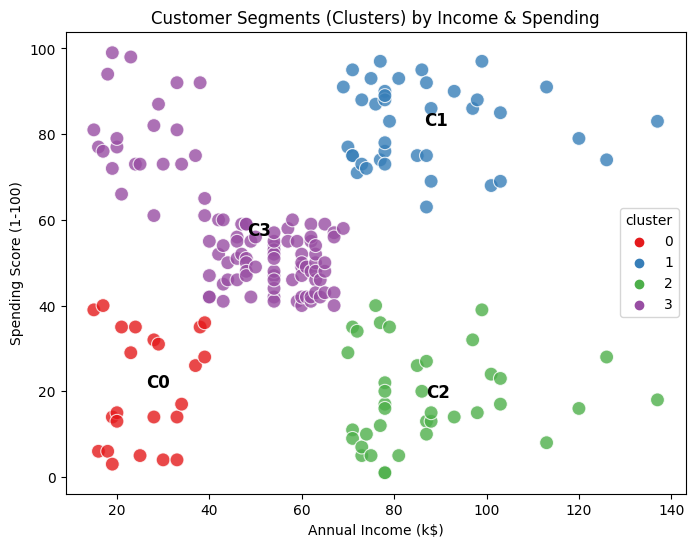

In [18]:
# Plot the customer clusters, with each cluster shown in a different color.
plt.figure(figsize=(8,6))
sn.scatterplot(
    data=df, x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="cluster", palette="Set1", s=100, alpha=0.8
)

for idx, (x,c) in enumerate(zip(centroids[:,0], centroids[:,1])):
    plt.text(x, c, f"C{idx}", fontsize=12, weight="bold")

plt.title("Customer Segments (Clusters) by Income & Spending")
plt.show()

In [19]:
# Identify high-value segment(s)
# Define "high-value" by high income & spending
cluster_summary = df.groupby("cluster").agg({
    "Annual Income (k$)": "mean",
    "Spending Score (1-100)": "mean",
    "Age": ["mean", "count"]
}).round(1)

cluster_summary.columns = ["AvgIncome", "AvgSpendingScore", "AvgAge", "Size"]
print("=== Cluster Summary ===")
print(cluster_summary, "\n")

=== Cluster Summary ===
         AvgIncome  AvgSpendingScore  AvgAge  Size
cluster                                           
0             26.3              20.9    45.2    23
1             86.5              82.1    32.7    39
2             87.0              18.6    40.4    38
3             48.3              56.5    39.2   100 



In [20]:
# Rank by combined metric
cluster_summary["ValueScore"] = (
    cluster_summary["AvgIncome"] * 0.6 +
    cluster_summary["AvgSpendingScore"] * 0.4
)
high_value = cluster_summary["ValueScore"].idxmax()
print(f"→ High-value cluster is Cluster {high_value} with ValueScore = {cluster_summary.loc[high_value, 'ValueScore']:.1f}\n")

→ High-value cluster is Cluster 1 with ValueScore = 84.7



In [21]:
# Profile high-value group
hv = df[df["cluster"] == high_value]
print("Sample high-value customer profiles (first 5 rows):")
print(hv[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]].head(), "\n")

Sample high-value customer profiles (first 5 rows):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
123         124    Male   39                  69                      91
125         126  Female   31                  70                      77
127         128    Male   40                  71                      95
129         130    Male   38                  71                      75
131         132    Male   39                  71                      75 



In [22]:
# Insights:
print(" High-value segment demographics:")
print(f"  - Avg Age: {cluster_summary.loc[high_value,'AvgAge']}")
print(f"  - Composition by Gender:")
print(hv["Gender"].value_counts(normalize=True).mul(100).round(1).astype(str) + "%")

 High-value segment demographics:
  - Avg Age: 32.7
  - Composition by Gender:
Gender
Female    53.8%
Male      46.2%
Name: proportion, dtype: object


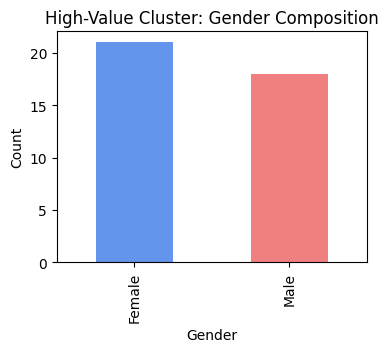

In [23]:
# Visualize gender distribution in this cluster
plt.figure(figsize=(4,3))
hv["Gender"].value_counts().plot(kind="bar", color=["cornflowerblue","lightcoral"])
plt.title("High-Value Cluster: Gender Composition")
plt.ylabel("Count")

plt.show()

# Dimensionality Reduction.

In [24]:
from sklearn.decomposition import PCA

In [25]:
# Use all numerical features for PCA
features_pca = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler_pca = StandardScaler()
features_scaled_pca = scaler_pca.fit_transform(features_pca)

In [26]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled_pca)

In [27]:
# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = df['cluster'] # Retain the K-Means cluster labels
print("=== PCA Components ===")
print(df_pca.head(), "\n")

=== PCA Components ===
        PC1       PC2  cluster
0 -0.615720 -1.763481        0
1 -1.665793 -1.820747        3
2  0.337862 -1.674799        0
3 -1.456573 -1.772430        3
4 -0.038465 -1.662740        0 



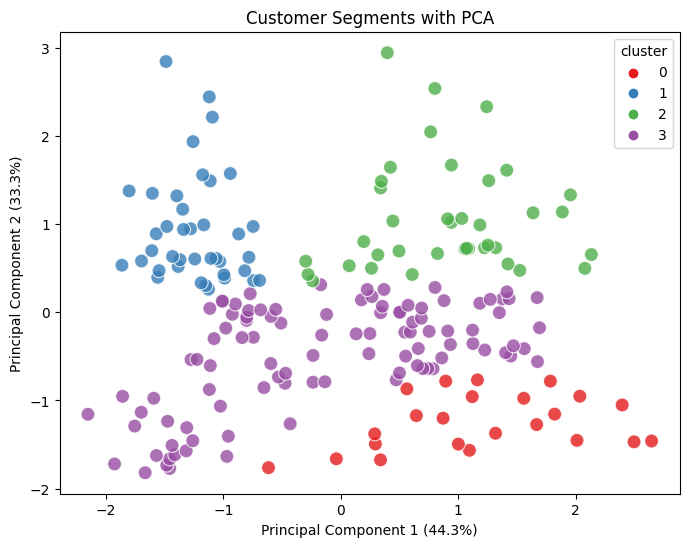

In [28]:
# Plot the PCA components to visualize the reduced data
plt.figure(figsize=(8, 6))
sn.scatterplot(
    data=df_pca, x="PC1", y="PC2",
    hue="cluster", palette="Set1", s=100, alpha=0.8
)

plt.title("Customer Segments with PCA")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")

plt.show()

# Exploring Other Clustering Algorithms.
- Apply two other common clustering algorithms: DBSCAN and Agglomerative Clustering.

# Agglomerative Clustering.

- This is a hierarchical clustering method that builds a cluster hierarchy. It's useful for visualizing the cluster structure as a dendrogram.

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [30]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5) # Choose a fixed number of clusters
df['agg_cluster'] = agg_clustering.fit_predict(features_scaled)

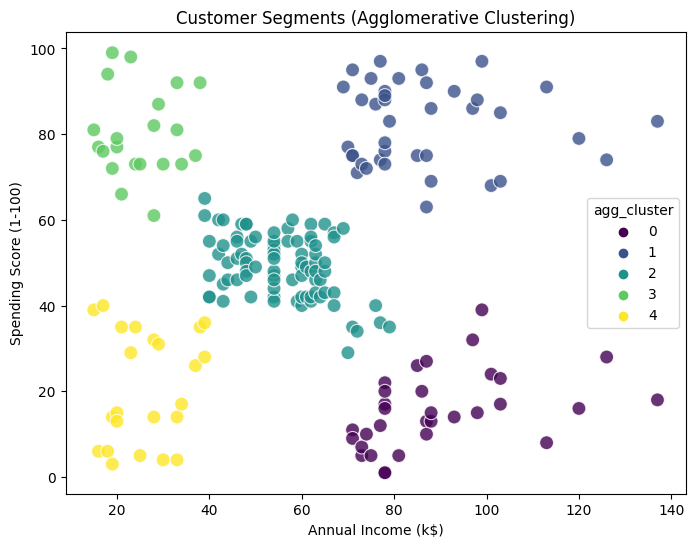

In [31]:
# Plot the clusters from Agglomerative Clustering
plt.figure(figsize=(8, 6))
sn.scatterplot(
    data=df,
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="agg_cluster", palette="viridis", s=100, alpha=0.8
)

plt.title("Customer Segments (Agglomerative Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

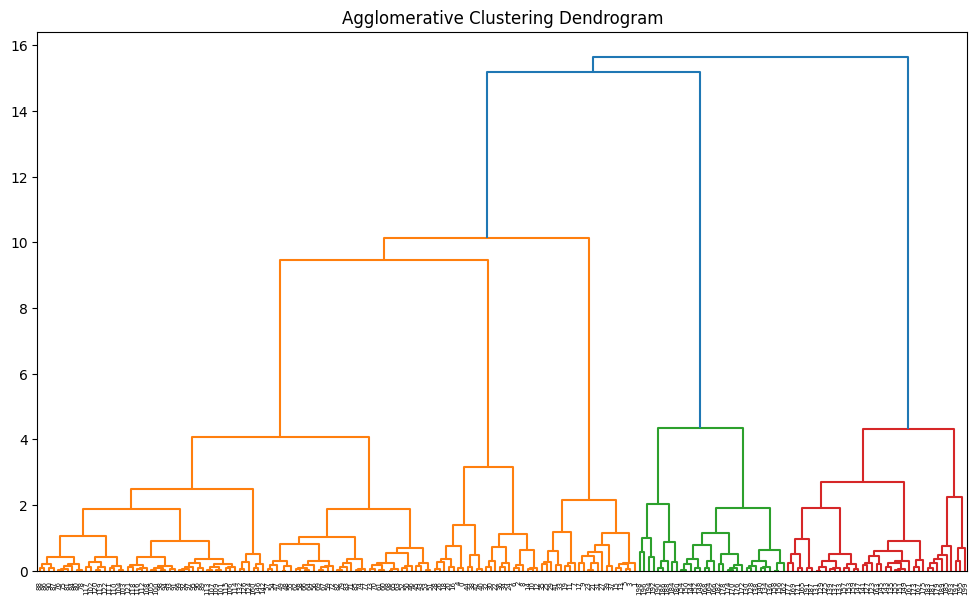

In [32]:
# Visualize the dendrogram to understand the cluster hierarchy
linked = linkage(features_scaled, method='ward')
plt.figure(figsize=(12, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Agglomerative Clustering Dendrogram")
plt.show()

# DBSCAN

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN) groups together points that are closely packed, marking points that are alone as noise. This is great for finding clusters of arbitrary shape and identifying outliers.

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
# Apply DBSCAN
# You may need to tune 'eps' (max distance) and 'min_samples'
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(features_scaled)

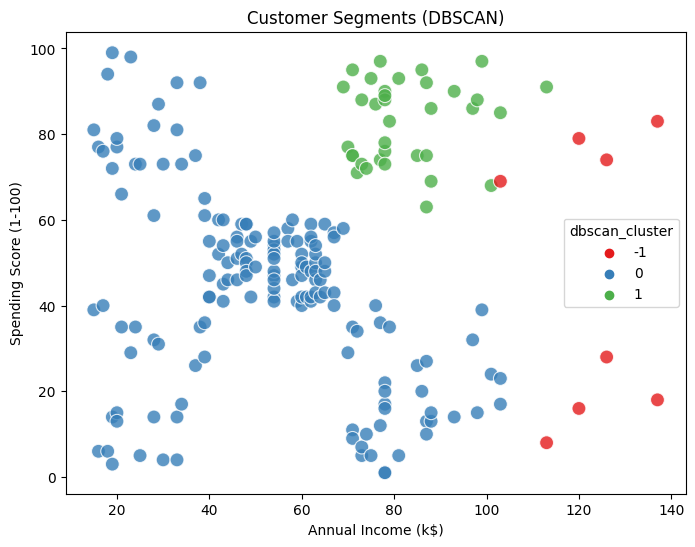

In [35]:
# Plot the clusters from DBSCAN. Note: Cluster -1 is noise.
plt.figure(figsize=(8, 6))
sn.scatterplot(
    data=df,
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="dbscan_cluster", palette="Set1", s=100, alpha=0.8
)

plt.title("Customer Segments (DBSCAN)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Comparing Clustering Models

- To compare the performance of K-Means and Agglomerative Clustering, we can use the Silhouette Score. This metric measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher value indicates better-defined clusters.

In [36]:
from sklearn.metrics import silhouette_score

In [37]:
# Calculate Silhouette Score for K-Means
kmeans_score = silhouette_score(features_scaled, df['cluster'])
print(f"K-Means Silhouette Score: {kmeans_score:.2f}")

# Calculate Silhouette Score for Agglomerative Clustering
# DBSCAN cannot be directly compared with Silhouette Score due to its noise handling (-1 cluster)
agg_score = silhouette_score(features_scaled, df['agg_cluster'])
print(f"Agglomerative Clustering Silhouette Score: {agg_score:.2f}")

K-Means Silhouette Score: 0.49
Agglomerative Clustering Silhouette Score: 0.55


# Conclusion.

A Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A score of **.55 for Agglomerative Clustering** and **.49 for K-Means** means that the Agglomerative Clustering model created more distinct and well-separated clusters than the K-Means model for this specific dataset.

***

### Understanding the Score

The Silhouette Score ranges from **-1 to +1**:
* A score close to **+1** indicates that the object is well-matched to its own cluster and poorly matched to its neighboring clusters. The clusters are dense and well-separated.
* A score close to **0** indicates that the object is on or very close to the decision boundary between two neighboring clusters. This suggests overlapping or ambiguous clusters.
* A score close to **-1** indicates that the object has been assigned to the wrong cluster.

### Why Agglomerative Performed Better

In this case, Agglomerative Clustering's higher score of .55 suggests that its cluster assignments result in more cohesive groups. This can happen if the underlying data has a non-spherical shape. . While K-Means works best with circular or spherical clusters, Agglomerative Clustering can be more effective at identifying clusters with more complex, elongated, or arbitrary shapes. This is likely why it produced a better-defined clustering solution for your data.

#### Conceptual Outlines for Further Steps

- Customer Lifetime Value (CLV)

- To calculate CLV, you would need transactional data for each customer, including purchase dates and amounts. A simple CLV model could be:

CLV=(Average
Purchase
Value×Purchase
Frequency)×Customer
Lifespan

![CLV FORMULA] (https://www.google.com/search?client=ms-android-hmd&sca_esv=2652951d1a1d52fe&sxsrf=AE3TifPpgV4II1tdpEHhEJRK3xesWBkPDg:1757794355119&udm=2&fbs=AIIjpHxU7SXXniUZfeShr2fp4giZ1Y6MJ25_tmWITc7uy4KIeuYzzFkfneXafNx6OMdA4MQRJc_t_TQjwHYrzlkIauOK_IaFSQcTHs2AgJbmYqOLNlPDT0Hy19TTgd1LyYk-nASP6vwo8-B6loSdTVvF3_GZTcdVGGW23Vv5QDzGwSEW9k88_VoukSq6yQOfA5dBvYDoc8JpoXMA6o9PqbsvZLaqjcfYgw&q=clv+formula+marketing&sa=X&ved=2ahUKEwj44P-gxtaPAxWThP0HHckMKysQtKgLegQIEhAB#sv=CAMS_wQa3wQKkQIKuQEStgEKd0FMa3Rfdkh3aVB4RkdlcnBJd0cxb09MUWRoS1Bxall1eHV1WWRyNUtfVXdDOW5vRnRmTWF0cW9UTk1qanJCS1hsWk1NVjgzLWtiZW4zQjlmc1d1MlNfSnZwQk10WjdMcEVhWVhvdEI3Q1ZPX2xxYXNwTjlDM3BREhdOOURGYUlMVEN2NkQ5dThQejRLeW1BcxoiQUZNQUdHcVVnYlVwVklVLWlYZnlSSS1CYWM3dzFKcnFxURIDODQ5GgEzIhoKAXESFWNsdiBmb3JtdWxhIG1hcmtldGluZyIHCgN0YnMSACImCgRlcWxkEh5DZ0lJQUJBQU9nUUlBQkFBVll1SndqMXRZUHZTUGcStgIKzwESzAEKjAFBTGt0X3ZISHBlV1paQ3NKWVFKR0VIOVdKMmZsZ1JPWTdheVFDZTRKb1U2cUpNLWNieXlXZEoxUjIyZGZlems1dEJYNS1kbWZTdFpTYmZMREtCeDBaWERFa3F5VXR4UjFFRDg2bmpsVzhPODhGYmp0QW5ZLUZLM0VlWVBpaUJEZHFaNDdwaWRVNjN2ORIXTjlERmFJTFRDdjZEOXU4UHo0S3ltQXMaIkFGTUFHR3BsZkg5MmFTMExWS2dReGVIMFlWTVVuUTFTYXcSBDQ2OTgaATMiGAoGaW1nZGlpEg5fby1Id056bGJJWElMTSIXCgVkb2NpZBIOU2pibVE1Q3lXZUJrSk0iJgoEZXFsZBIeQ2dJSUFCQUFPZ1FJQUJBQVZZdUp3ajF0WVB2U1BnKhBlLV9vLUh3TnpsYklYSUxNIAQqFwoBcxIQZS1fby1Id056bGJJWElMTRgBMAEYByD0yfnuAjABSgoIAhACGAIgAigC)

- You could then use this calculated CLV as an additional feature in your clustering model to segment customers based on their long-term value.

# The End !!!